In [6]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score

In [2]:
all_new = pd.read_csv('data/feature_df_agg_svd16.csv')

In [3]:
test_set = all_new[all_new["data_type"] == "test"]
train_set = all_new[all_new["data_type"] == "train"]

In [4]:
def optimize_threshold(oof, y_train):
    best_score = 0
    scores = []
    ratios = []
    for thr in np.arange(0, 1.0, 0.025):
        oof_ = np.where(oof<thr, 0, 1)
        ratio = np.count_nonzero(oof_>0)/len(oof_)
        ratios.append(ratio)
        f1score = f1_score(y_true=y_train, y_pred=oof_,average='binary', sample_weight=None, zero_division='warn')
        scores.append(f1score)
        best_score = max(best_score, f1score)
        if f1score == best_score:
            best_threshold = thr
    plt.figure()
    plt.title('f1_score')
    plt.scatter(np.arange(0, 1.0, 0.025), scores)
    plt.scatter(np.arange(0, 1.0, 0.025), ratios)
    return best_score, best_threshold

0.8187466714006746 0.375


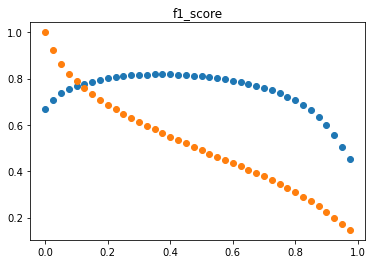

In [9]:
with open("data/lgmb_ROBERTA_seed2021.json") as f:
    trained_config = json.load(f)
_oof = trained_config["out_of_fold"]
    
    
best_score, best_threshold = optimize_threshold(_oof, list(train_set["state"]))
print(best_score, best_threshold)